In [1]:
from load_data import *

testBehav = behavior[(behavior.session=='experiment') & behavior.condType.isin(condTypes)]
usedTestSubjs = testBehav[~testBehav.excluded].subjectId.unique()
testTrials = testBehav[testBehav.subjectId.isin(usedTestSubjs)].copy()
testTrials['correct'] = (testTrials.response==testTrials.direction)
testTrials['prefSel'] = (testTrials.response==testTrials.preferred)

(Re)loading load_data


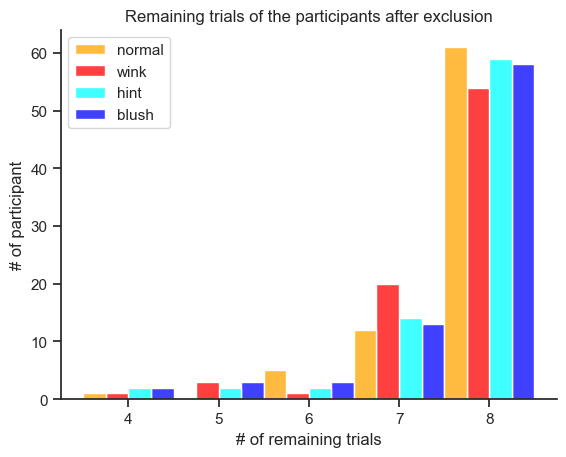

In [2]:
ax = seaborn.histplot(
    data=testTrials[~testTrials.excluded].groupby(['condType', 'subjectId'], as_index=False).trialCount.count(),
    x='trialCount',
    hue='condType',
    discrete=True,
    stat='count',
    multiple='dodge',
    palette=condColors,
    hue_order=condTypes)
ax.get_legend().set_title(None)
ax.set_title('Remaining trials of the participants after exclusion')
ax.set_xlabel('# of remaining trials')
ax.set_ylabel('# of participant')
seaborn.despine(ax=ax)

In [3]:
print('Proportion of correct responses')
correctRatios = testTrials.groupby(['condType', 'subjectId'], as_index=False).correct.mean()
correctRatios.groupby('condType', as_index=False).correct.agg(['mean', 'median', 'min', 'max', 'std'])

Proportion of correct responses


,condType,mean,median,min,max,std
0,blush,0.468354,0.500,0.125,0.875,0.185046
1,hint,0.996835,1.000,0.875,1.000,0.019761
2,normal,0.678797,0.750,0.000,1.000,0.233153
3,wink,0.794304,0.875,0.250,1.000,0.174539


In [4]:
print('Proportion of preferred responses')
prefSelRatios = testTrials.groupby(['condType', 'subjectId'], as_index=False).prefSel.mean()
prefSelRatios.groupby('condType', as_index=False).prefSel.agg(['mean', 'median', 'min', 'max', 'std'])

Proportion of preferred responses


,condType,mean,median,min,max,std
0,blush,0.485759,0.5,0.000,0.875,0.194049
1,hint,0.996835,1.0,0.875,1.000,0.019761
2,normal,0.821203,1.0,0.000,1.000,0.273483
3,wink,0.946203,1.0,0.250,1.000,0.130770


In [5]:
def condTypeBoxPlot(data, dv, ax=None, faceAlpha=0.2):
    if ax is None:
        ax = plt.figure(figsize=(6, 5), dpi=100).subplots()
    ax.set_xlabel('Condition')
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    y = [data.query('condType==@c')[dv] for c in condTypes]
    medianProps = { "markeredgecolor": "black" }
    meanProps = { "marker": "+", "markeredgecolor": "black", "markersize": "8" }
    boxPlot = ax.boxplot(
        y, patch_artist=True, tick_labels=condTypes,
        showmeans=True, meanprops=meanProps, medianprops=medianProps, widths=0.8)
    for box, condType in zip(boxPlot['boxes'], condTypes):
        box.set_color((condColors[condType], faceAlpha))
        box.set_edgecolor((condColors[condType], 1.))
    for median in boxPlot['medians']:
        median.set_color('black')
    return ax

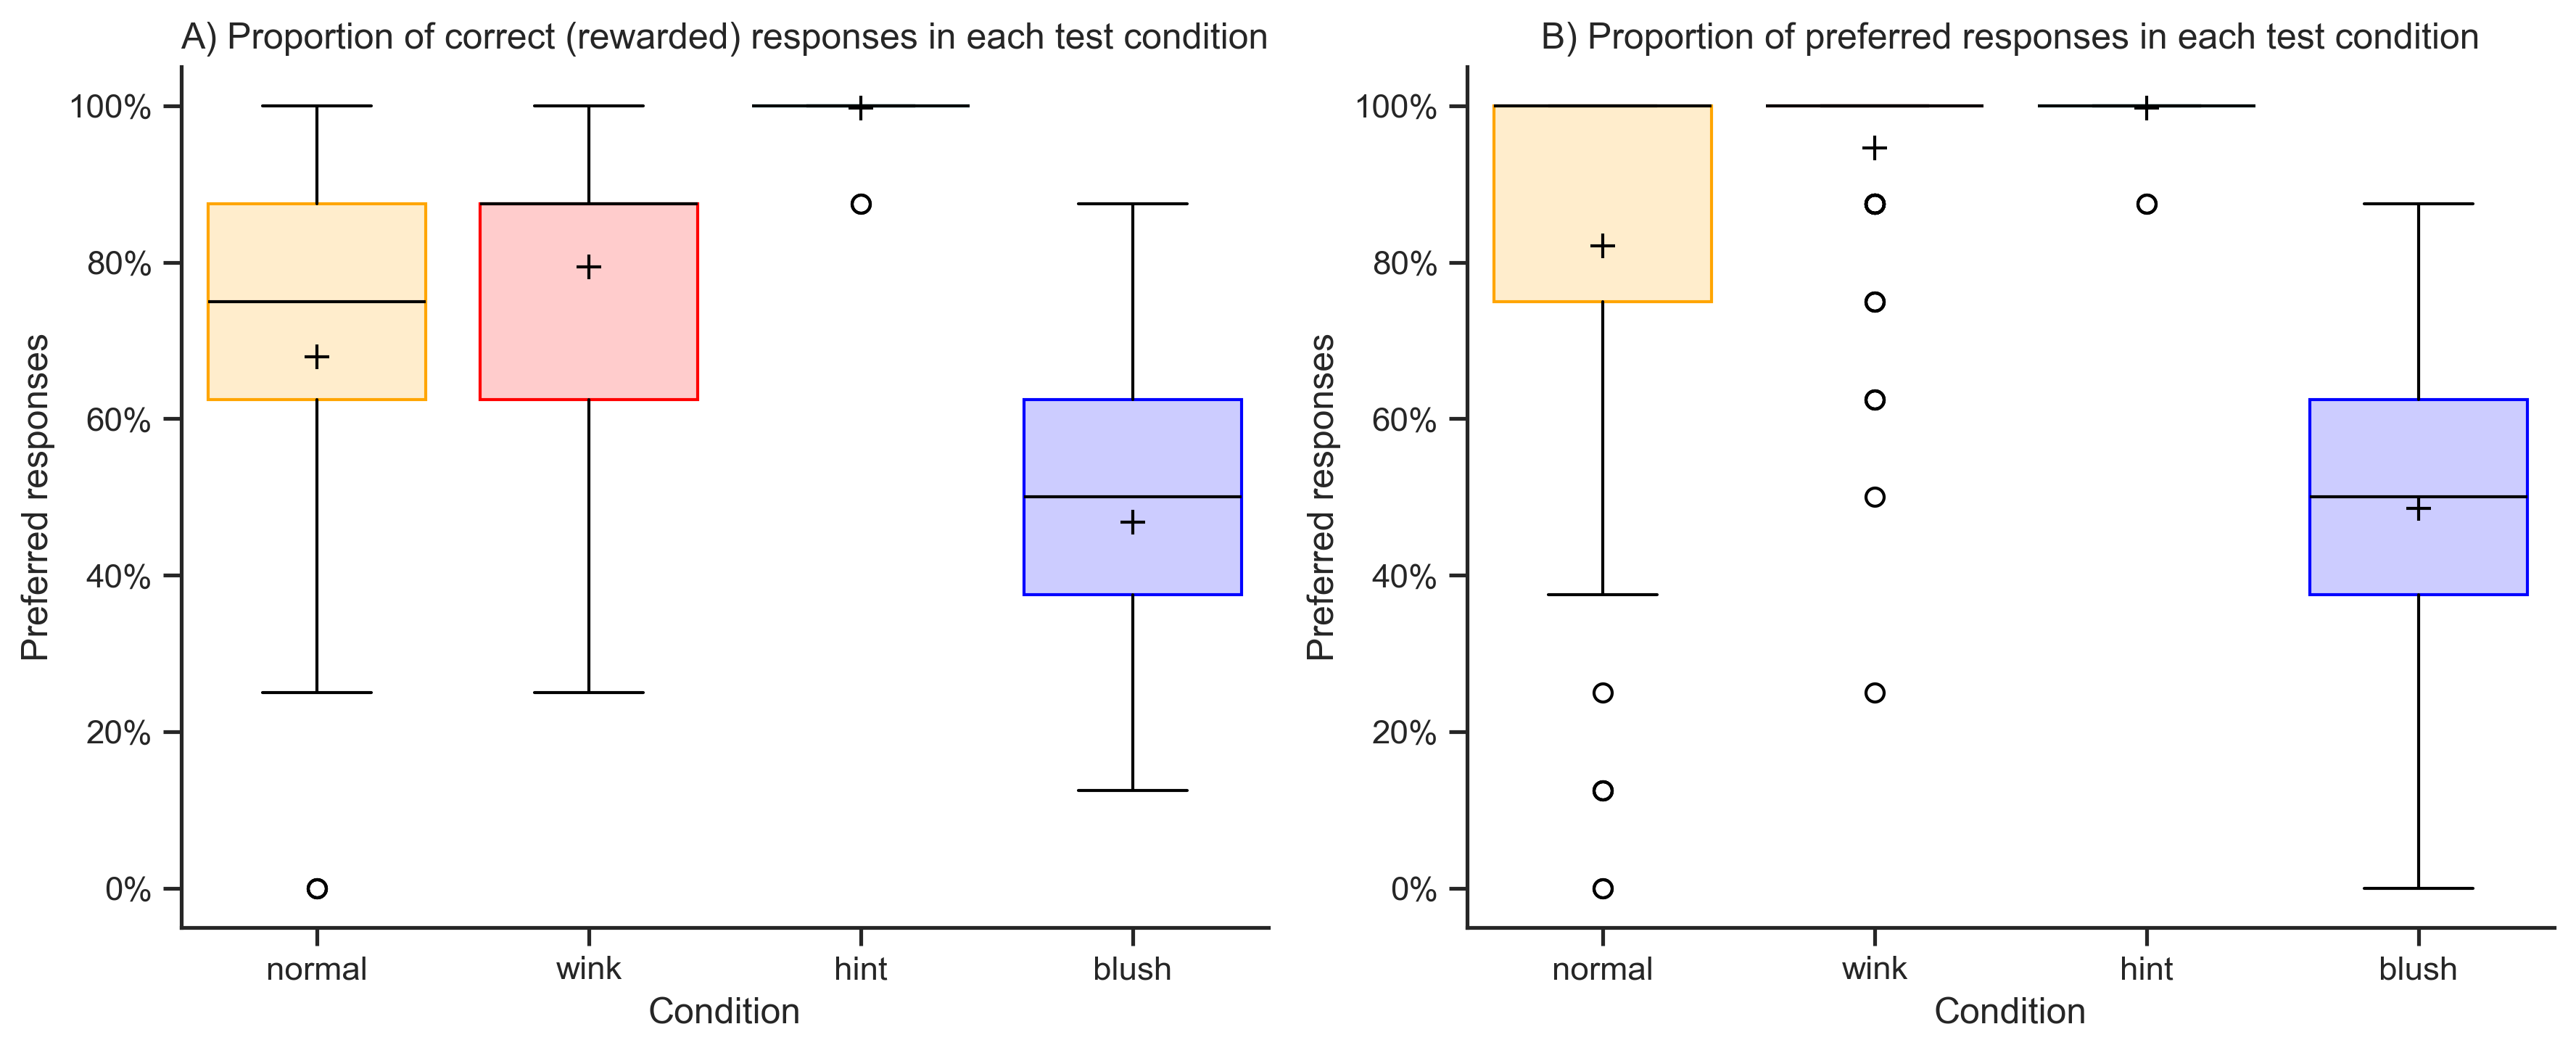

In [6]:
fig = plt.figure(figsize=(12, 5), dpi=300)
ax1, ax2 = fig.subplots(nrows=1, ncols=2)

condTypeBoxPlot(correctRatios, 'correct', ax=ax1)
ax1.set_title('A) Proportion of correct (rewarded) responses in each test condition')
ax1.set_ylabel('Preferred responses')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))

condTypeBoxPlot( prefSelRatios, 'prefSel', ax=ax2)
ax2.set_title('B) Proportion of preferred responses in each test condition')
ax2.set_ylabel('Preferred responses')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))

plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
fig.savefig(os.path.join(output_dir, 'figure2.png'))
fig.savefig(os.path.join(output_dir, 'figure2.pdf'))

In [7]:
for condType in condTypes:
    print(f'Test if proportion of correct responses in condition {condType} is different from 50%')
    res = testTrials[(testTrials.condType==condType)].groupby('correct').trialCount.count()
    print('\t', stats.binomtest(k=res.loc[True], n=res.sum(), p=0.5))

Test if proportion of correct responses in condition normal is different from 50%
	 BinomTestResult(k=429, n=632, alternative='two-sided', statistic=0.6787974683544303, pvalue=1.4570803872528328e-19)
Test if proportion of correct responses in condition wink is different from 50%
	 BinomTestResult(k=502, n=632, alternative='two-sided', statistic=0.7943037974683544, pvalue=1.8212571054181376e-52)
Test if proportion of correct responses in condition hint is different from 50%
	 BinomTestResult(k=630, n=632, alternative='two-sided', statistic=0.9968354430379747, pvalue=2.2447382132367455e-185)
Test if proportion of correct responses in condition blush is different from 50%
	 BinomTestResult(k=296, n=632, alternative='two-sided', statistic=0.46835443037974683, pvalue=0.12075210528947186)


In [8]:
for condType in ['normal', 'wink']:
    print(f'Test if proportion of correct responses in condition {condType} is different from 80%')
    res = testTrials[(testTrials.condType==condType)].groupby('correct').trialCount.count()
    print('\t', stats.binomtest(k=res.loc[True], n=res.sum(), p=0.8))

Test if proportion of correct responses in condition normal is different from 80%
	 BinomTestResult(k=429, n=632, alternative='two-sided', statistic=0.6787974683544303, pvalue=7.14457691810874e-13)
Test if proportion of correct responses in condition wink is different from 80%
	 BinomTestResult(k=502, n=632, alternative='two-sided', statistic=0.7943037974683544, pvalue=0.7277653086303917)


In [9]:
print('Test if proportions of the correct responses in conditions normal and wink are different')
res = testTrials[testTrials.condType.isin(['normal', 'wink'])].groupby(['condType', 'correct']).trialCount.count().unstack('correct')
#print(res)
print('\t', stats.fisher_exact(res))

Test if proportions of the correct responses in conditions normal and wink are different
	 SignificanceResult(statistic=1.8272547964855657, pvalue=4.012587103313955e-06)


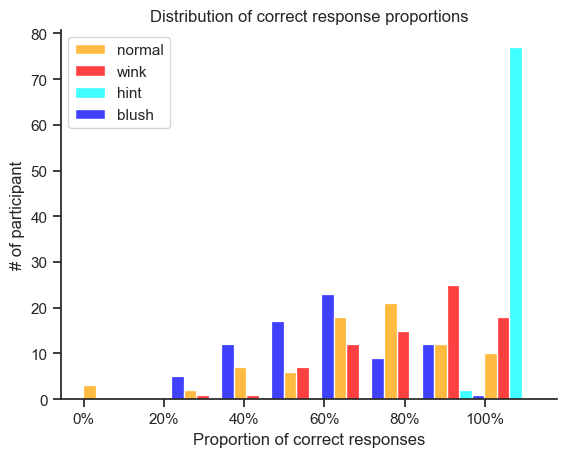

In [10]:
ax = seaborn.histplot(
    data=correctRatios,
    x='correct',
    bins=np.arange(-0.01, 9., 1.) / 8,
    hue='condType',
    stat='count',
    multiple='dodge',
    palette=condColors,
    hue_order=condTypes)
ax.get_legend().set_title(None)
ax.set_title('Distribution of correct response proportions')
ax.set_xlabel('Proportion of correct responses')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))
ax.set_ylabel('# of participant')
seaborn.despine(ax=ax)

SignificanceResult(statistic=0.1327664355028748, pvalue=0.24344595467041832)

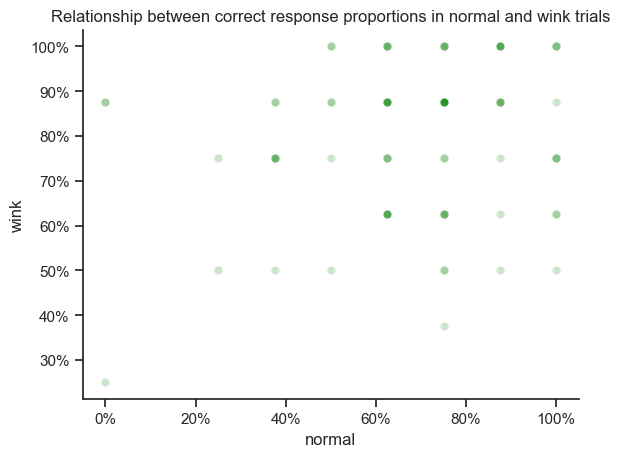

In [11]:
res = correctRatios.set_index(['condType', 'subjectId']).loc[['normal', 'wink']].correct.unstack('condType')
ax = seaborn.scatterplot(
    data=res,
    x='normal',
    y='wink',
    color='green',
    alpha=0.2)
ax.set_title('Relationship between correct response proportions in normal and wink trials')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))
seaborn.despine(ax=ax)
stats.spearmanr(res.normal, res.wink)

In [12]:
for condType in condTypes:
    print(f'Test if proportion of preferred responses in condition {condType} is different from 50%')
    res = testTrials[(testTrials.condType==condType)].groupby('prefSel').trialCount.count()
    print('\t', stats.binomtest(k=res.loc[True], n=res.sum(), p=0.5))

Test if proportion of preferred responses in condition normal is different from 50%
	 BinomTestResult(k=519, n=632, alternative='two-sided', statistic=0.8212025316455697, pvalue=4.533238240449359e-63)
Test if proportion of preferred responses in condition wink is different from 50%
	 BinomTestResult(k=598, n=632, alternative='two-sided', statistic=0.9462025316455697, pvalue=2.7359973144020684e-134)
Test if proportion of preferred responses in condition hint is different from 50%
	 BinomTestResult(k=630, n=632, alternative='two-sided', statistic=0.9968354430379747, pvalue=2.2447382132367455e-185)
Test if proportion of preferred responses in condition blush is different from 50%
	 BinomTestResult(k=307, n=632, alternative='two-sided', statistic=0.48575949367088606, pvalue=0.4989294831955682)


In [13]:
print('Test if proportions of the preferred responses in conditions normal and wink are different')
res = testTrials[testTrials.condType.isin(['normal', 'wink'])].groupby(['condType', 'prefSel']).trialCount.count().unstack('prefSel')
#print(res)
print('\t', stats.fisher_exact(res))

Test if proportions of the preferred responses in conditions normal and wink are different
	 SignificanceResult(statistic=3.8294230987192566, pvalue=2.5684873227169332e-12)


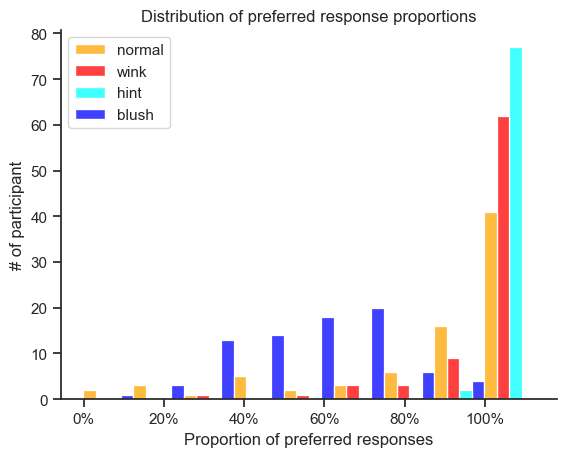

In [14]:
ax = seaborn.histplot(
    data=prefSelRatios,
    x='prefSel',
    bins=np.arange(-0.01, 9., 1.) / 8,
    hue='condType',
    stat='count',
    multiple='dodge',
    palette=condColors,
    hue_order=condTypes)
ax.get_legend().set_title(None)
ax.set_title('Distribution of preferred response proportions')
ax.set_xlabel('Proportion of preferred responses')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))
ax.set_ylabel('# of participant')
seaborn.despine(ax=ax)

SignificanceResult(statistic=0.5042800640803027, pvalue=2.155240630883944e-06)

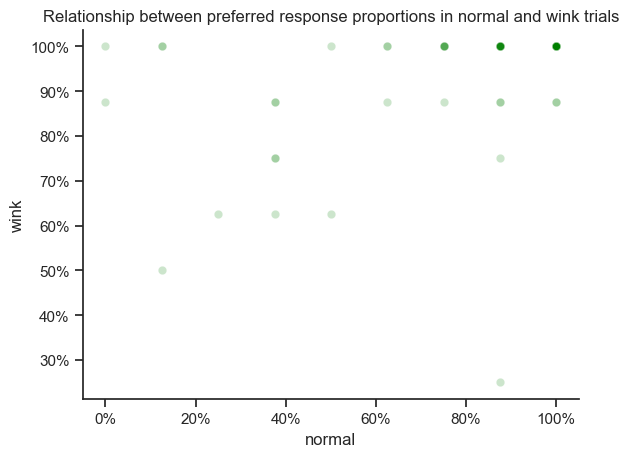

In [15]:
res = prefSelRatios.set_index(['condType', 'subjectId']).loc[['normal', 'wink']].prefSel.unstack('condType')
ax = seaborn.scatterplot(
    data=res,
    x='normal',
    y='wink',
    color='green',
    alpha=0.2)
ax.set_title('Relationship between preferred response proportions in normal and wink trials')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))
seaborn.despine(ax=ax)
stats.spearmanr(res.normal, res.wink)